In [80]:
import yfinance as yf
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd 

In [81]:
def get_historical_data(symbol, start_date=None):
    ticker = yf.Ticker(symbol)
    if start_date:
        data = ticker.history(start=start_date, interval='1m')
    else:
        data = ticker.history(interval='1m')
    return data



In [82]:
df = get_historical_data('ETH-USD','2023-06-26')

In [83]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-06-26 00:00:00+00:00,1900.050293,1900.050293,1900.050293,1900.050293,0,0.0,0.0
2023-06-26 00:01:00+00:00,1899.672974,1899.672974,1899.672974,1899.672974,0,0.0,0.0
2023-06-26 00:02:00+00:00,1898.131714,1898.131714,1898.131714,1898.131714,0,0.0,0.0
2023-06-26 00:03:00+00:00,1898.070557,1898.070557,1898.070557,1898.070557,1014272,0.0,0.0
2023-06-26 00:04:00+00:00,1897.834473,1897.834473,1897.834473,1897.834473,251047936,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-27 06:33:00+00:00,1866.045288,1866.045288,1866.045288,1866.045288,2060288,0.0,0.0
2023-06-27 06:34:00+00:00,1865.599243,1865.599243,1865.599243,1865.599243,2880512,0.0,0.0
2023-06-27 06:35:00+00:00,1865.347534,1865.347534,1865.347534,1865.347534,0,0.0,0.0


In [84]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

In [85]:
df['rsi_14'] = get_rsi(df['Close'], 14)
df = df.dropna()

In [86]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi_14
Datetime,,,,,,,,
2023-06-26 00:04:00+00:00,1897.834473,1897.834473,1897.834473,1897.834473,251047936,0.0,0.0,0.000000
2023-06-26 00:05:00+00:00,1898.058228,1898.058228,1898.058228,1898.058228,2692608,0.0,0.0,11.130692
2023-06-26 00:06:00+00:00,1898.819336,1898.819336,1898.819336,1898.819336,1637888,0.0,0.0,36.870833
2023-06-26 00:07:00+00:00,1901.740967,1901.740967,1901.740967,1901.740967,5617664,0.0,0.0,71.270372
2023-06-26 00:08:00+00:00,1901.392212,1901.392212,1901.392212,1901.392212,0,0.0,0.0,66.604772
...,...,...,...,...,...,...,...,...
2023-06-27 06:33:00+00:00,1866.045288,1866.045288,1866.045288,1866.045288,2060288,0.0,0.0,53.785173
2023-06-27 06:34:00+00:00,1865.599243,1865.599243,1865.599243,1865.599243,2880512,0.0,0.0,50.704060
2023-06-27 06:35:00+00:00,1865.347534,1865.347534,1865.347534,1865.347534,0,0.0,0.0,48.998251


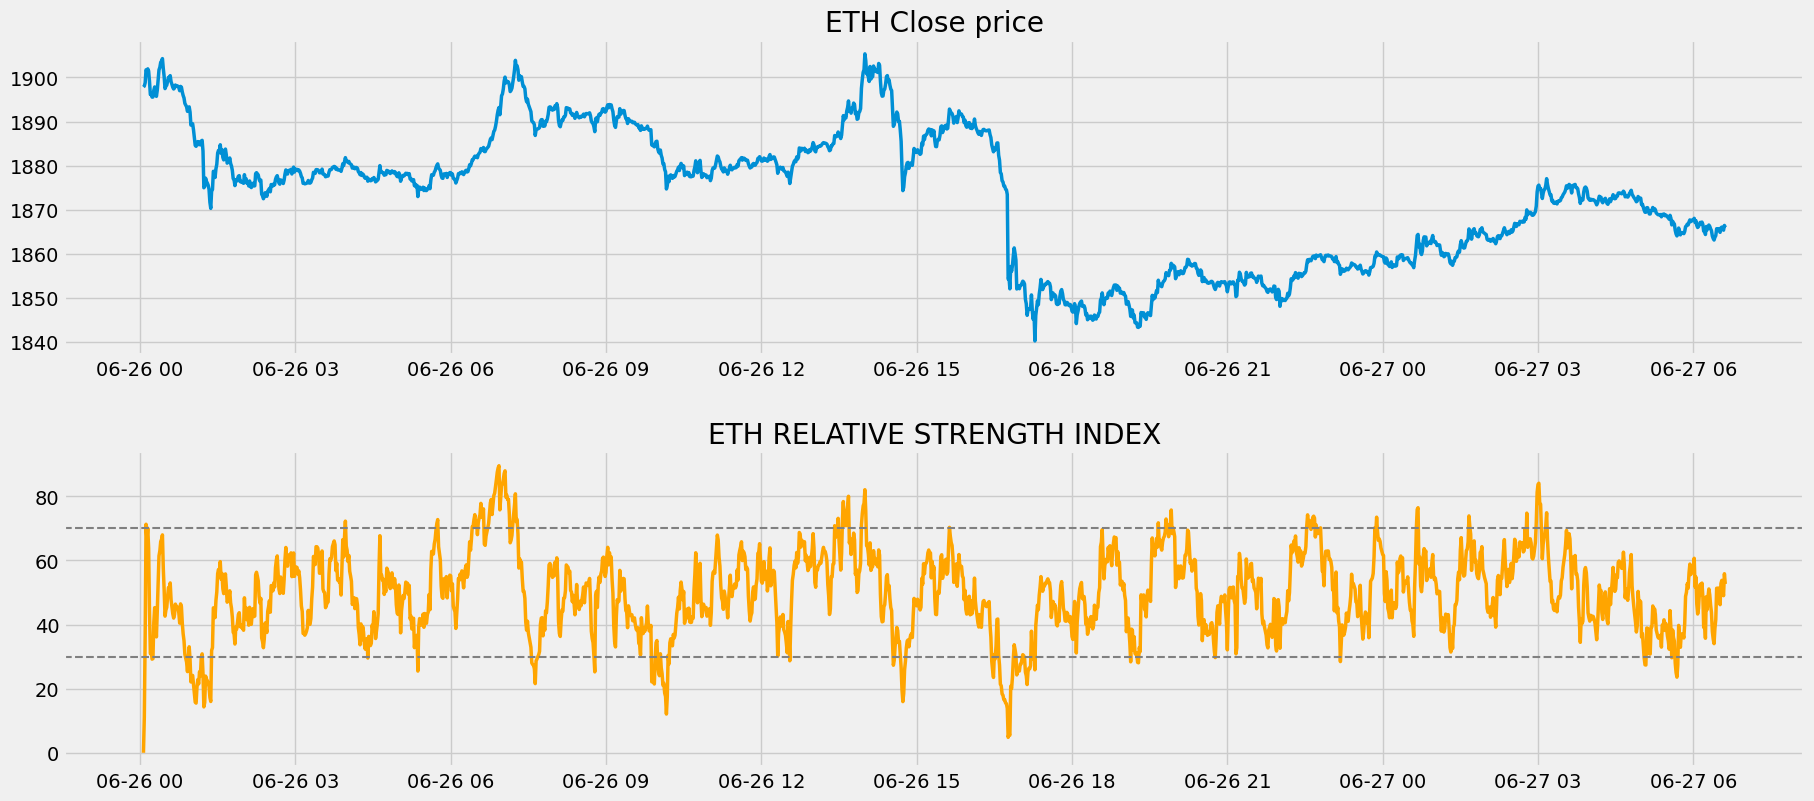

In [87]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['Close'], linewidth = 2.5)
ax1.set_title('ETH Close price')
ax2.plot(df['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('ETH RELATIVE STRENGTH INDEX')
plt.show()

In [88]:
def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal

In [89]:
buy_price, sell_price, rsi_signal = implement_rsi_strategy(df['Close'], df['rsi_14'])

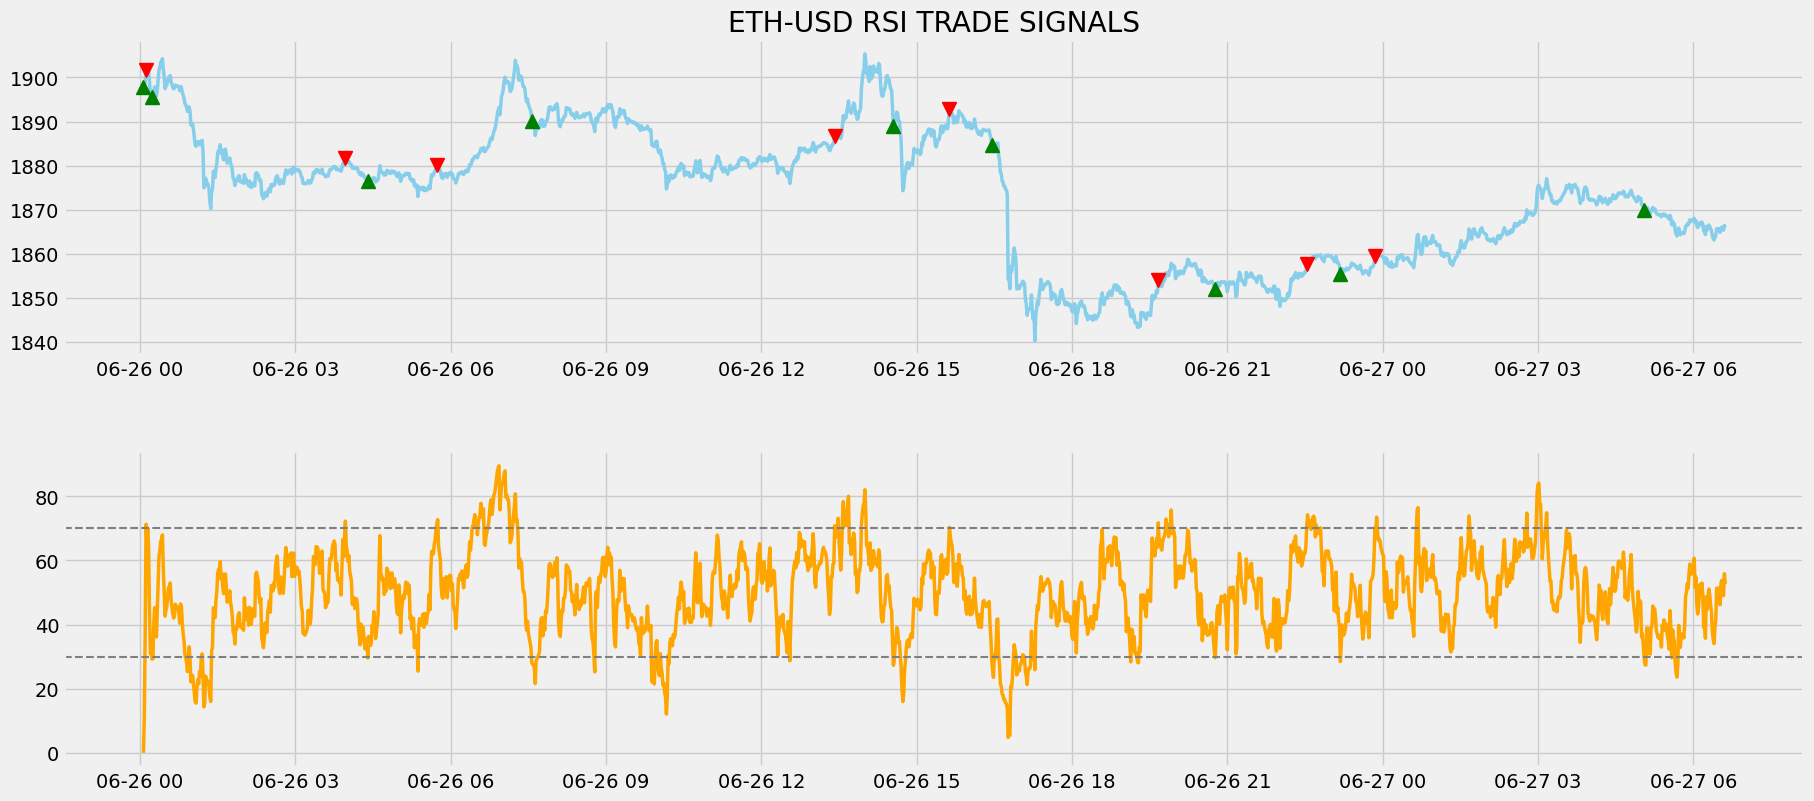

In [90]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['Close'], linewidth = 2.5, color = 'skyblue', label = 'ETH-USD')
ax1.plot(df.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(df.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('ETH-USD RSI TRADE SIGNALS')
ax2.plot(df['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()